In [48]:
from google.colab import drive
drive.mount('/content/gdrive/') 
%cd "/content/gdrive/MyDrive/Colab Notebooks/ML_project"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/ML_project


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

# from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

# Read the train.csv file

In [50]:
df = pd.read_csv('train.csv', index_col=0)

# Combine the features Title and Abstract into one
df['News'] = df['Title'].str.cat(df['Abstract'],sep=" ")

# Drop all rows that contain NaN under those columns
df.dropna(subset = ["News"], inplace=True)

print('Length of the training dataset ', len(df))
df.head()

Length of the training dataset  77100


,NewID,Category,Title,Abstract,News
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","The Brands Queen Elizabeth, Prince Charles, an..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,Walmart Slashes Prices on Last-Generation iPad...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,50 Worst Habits For Belly Fat These seemingly ...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,The Cost of Trump's Aid Freeze in the Trenches...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",I Was An NBA Wife. Here's How It Affected My M...


# Plot training data features distribution

Number of Catergories  17  which contains


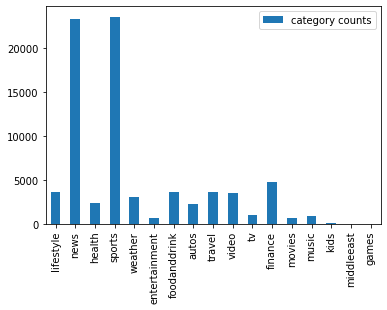

In [51]:
# Get the unique Catergory classes in the dataset
classes = df.Category.unique()
print('Number of Catergories ', len(classes), ' which contains')

# Create a sample dataframe with an text index and plot bar chart
counts = []
for i in classes:
  count = len(df[df['Category']==i])
  counts.append(count)

categories = ['lifestyle', 'news', 'health', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games']

plotdata = pd.DataFrame({"category counts": counts}, index=categories)
plotdata.plot(kind="bar")

# Do Bag of Words on text (Title only)

In [52]:
x_title_train, y_title_train = df.Title.values, df.Category.values

title_vectorize = CountVectorizer()
X_title_train = title_vectorize.fit_transform(x_title_train)
# X_title_test = title_vectorize.transform(x_title_test)
#print('The first new \n\n', x_title_train[0], '\n', X_title_train[0])

model_title = LogisticRegression(max_iter=1000)
model_title.fit(X_title_train, y_title_train)

LogisticRegression(max_iter=1000)

# Do Bag of Words on text (Title and Abstract)

In [53]:
# Vectorizing the text values using CountVectorizer
x_title_abstract_train, y_title_abstract_train = df.News.values, df.Category.values

# y_train=y_train.astype('int')

news_vectorize = CountVectorizer()
# vectorize.fit(x_train)
X_title_abstract_train = news_vectorize.fit_transform(x_title_abstract_train)

# Train the model using LogisticRegression algorithm
model_news = LogisticRegression(max_iter=1000)
model_news.fit(X_title_abstract_train, y_title_abstract_train)

LogisticRegression(max_iter=1000)

# Read the test.csv file and plot the distribution

In [54]:
test_df = pd.read_csv('./test.csv', index_col=0)
test_df['News'] = test_df['Title'].str.cat(test_df['Abstract'],sep=" ")
test_df.dropna(subset = ["News"], inplace=True)

Number of Catergories  16  which contains


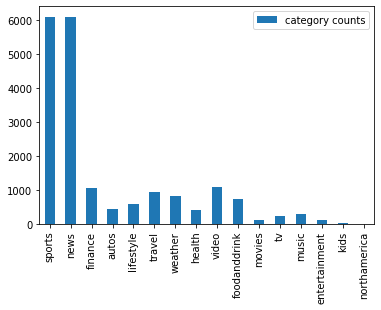

In [55]:
# Get the unique Catergory classes in the test.csv dataset
classes_test = test_df.Category.unique()
print('Number of Catergories ', len(classes_test), ' which contains')

# Create a sample dataframe with an text index and plot bar chart
counts_test = []

for i in classes_test:
  count = len(test_df[test_df['Category']==i])
  counts_test.append(count)

categories_test = ['sports', 'news', 'finance', 'autos', 'lifestyle', 'travel',
       'weather', 'health', 'video', 'foodanddrink', 'movies', 'tv',
       'music', 'entertainment', 'kids', 'northamerica']

plotdata_test = pd.DataFrame({"category counts": counts_test}, index=categories_test)
plotdata_test.plot(kind="bar")

# Accuracy on unseen dataset test.csv based on text (Title only)

In [56]:
# Testing the accuracy of only Title feature on test.csv file
feature_test_title, label_test_title = test_df.Title.values, test_df.Category.values
Feature_test_title = title_vectorize.transform(feature_test_title)
accuracy_title = model_title.score(Feature_test_title, label_test_title)
print("Test.csv's on feature Title accuracy: ", accuracy_title, '\n')

title_predict = model_title.predict(Feature_test_title)
print(classification_report(label_test_title, title_predict, target_names=None))

Test.csv's on feature Title accuracy:  0.7085524931622134 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

        autos       0.61      0.50      0.55       436
entertainment       0.61      0.35      0.45       111
      finance       0.53      0.49      0.51      1064
 foodanddrink       0.71      0.66      0.68       731
       health       0.64      0.52      0.57       417
         kids       0.00      0.00      0.00        16
    lifestyle       0.34      0.34      0.34       587
       movies       0.74      0.41      0.53       127
        music       0.81      0.58      0.68       278
         news       0.65      0.77      0.71      6076
 northamerica       0.00      0.00      0.00         1
       sports       0.90      0.94      0.92      6090
       travel       0.46      0.34      0.39       951
           tv       0.52      0.28      0.37       227
        video       0.39      0.22      0.28      1086
      weather       0.72      0.63      0.67       814

     accuracy                           0.71     19012
    macr

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy on unseen dataset test.csv based on text (Title and Abstract)

In [57]:
# Testing the accuracy of Title and Abstract - News feature on test.csv file
feature_test_news, label_test_news = test_df.News.values, test_df.Category.values
Feature_test_news = news_vectorize.transform(feature_test_news)
accuracy_news = model_news.score(Feature_test_news, label_test_news)
print("Test.csv's on feature Title and Abstract - News accuracy: ", accuracy_news, '\n')

news_predict = model_news.predict(Feature_test_news)
print(classification_report(label_test_news, news_predict, target_names=None))

Test.csv's on feature Title and Abstract - News accuracy:  0.7347990742688828 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

        autos       0.60      0.56      0.58       436
entertainment       0.47      0.39      0.43       111
      finance       0.54      0.55      0.54      1064
 foodanddrink       0.74      0.72      0.73       731
       health       0.59      0.59      0.59       417
         kids       0.00      0.00      0.00        16
    lifestyle       0.37      0.38      0.38       587
       movies       0.68      0.51      0.59       127
        music       0.78      0.61      0.69       278
         news       0.70      0.76      0.73      6076
 northamerica       0.00      0.00      0.00         1
       sports       0.93      0.95      0.94      6090
       travel       0.48      0.40      0.44       951
           tv       0.51      0.36      0.42       227
        video       0.52      0.39      0.44      1086
      weather       0.74      0.69      0.72       814

     accuracy                           0.73     19012
    macr

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix for Title 

As the Consufion Matric table shows below, Logistic Regression performs better in News categories as sports and news.


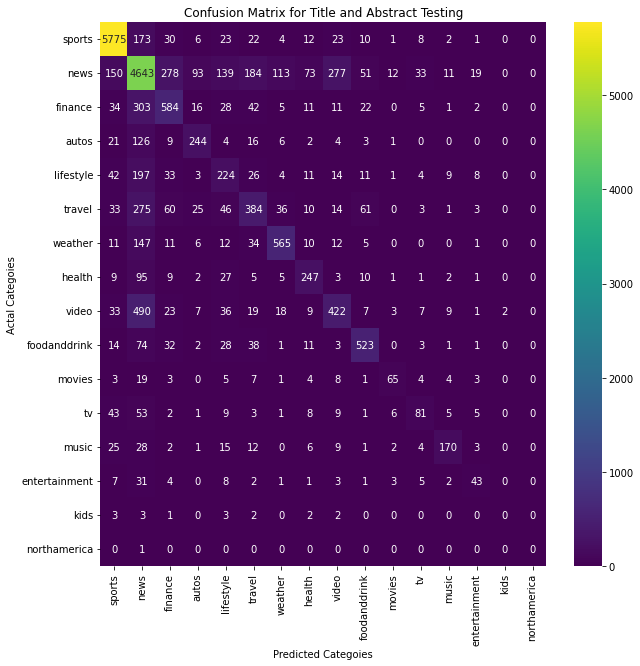

In [66]:
labels = ['sports', 'news', 'finance', 'autos', 'lifestyle', 'travel', 'weather', 'health',
 'video', 'foodanddrink', 'movies', 'tv', 'music', 'entertainment', 'kids',
 'northamerica']

c_m = confusion_matrix(label_test_news, news_predict, labels = labels)

#Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(c_m, labels, labels), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix for Title and Abstract Testing')
plt.ylabel('Actal Categoies')
plt.xlabel('Predicted Categoies')
print('As the Consufion Matric table shows below, Logistic Regression performs better in News categories as sports and news.')
plt.show()